# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

To recommend steps that the College Board should take to increase the SAT participation rate in **Missouri**.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

In [3]:
%pwd

'C:\\Users\\XXX\\Desktop\\GADSI\\dsi-sg-10-repo-workarea\\Project1234\\project_1\\code'

In [4]:
%cd ../data/

C:\Users\XXX\Desktop\GADSI\dsi-sg-10-repo-workarea\Project1234\project_1\data


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [5]:
df_sat_2017 = pd.read_csv('sat_2017.csv')
df_act_2017 = pd.read_csv('act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [6]:
print('First 10 rows from sat_2017.csv:')
display(df_sat_2017.head(10))
print()
print('First 10 rows from act_2017.csv:')
display(df_act_2017.head(10))

First 10 rows from sat_2017.csv:


State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017


First 10 rows from act_2017.csv:


State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

### sat_2017.csv
sat_2017.csv is a dataset that describes, for each state in the US, the participation rate, aggregate component subject scores and aggregate total score for the SAT standardized test in 2017.

The dataset comprises 51 rows and 5 columns, where each row provides the data for one state. All 50 states of the US are represented, plus the District of Columbia (being the 51st state in the dataset).

The columns are:

	1) State: the state in question
	2) Participation: the participation rate (in %)
	3) Evidence-Based Reading and Writing: aggregate score for this subject
	4) Math: aggregate score for this subject
	5) Total: aggregate total score

The dataset does not contain any null values. 



### act_2017.csv
act_2017.csv is a dataset that describes, for each state in the US, the participation rate, aggregate component subject scores and aggregate composite score for the ACT test in 2017.

The dataset comprises 52 rows and 7 columns, where each row is intended to provide the data for one state. All 50 states of the US are represented, plus the District of Columbia (being the 51st state in the dataset). There is 1 additional row for which the state is labeled as 'National' and does not appear to represent data pertaining to any specific state.

The columns are:

	1) State: the state in question
	2) Participation: the participation rate (in %)
	3) English: aggregate score for this subject
	4) Math: aggregate score for this subject
	5) Reading: aggregate score for this subject
	6) Science: aggregate score for this subject
	7) Composite: aggregate total score

The dataset does not contain any null values.

#### 4a. Does the data look complete? 

The data appears to be complete. There are no null values.

In [7]:
df_act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

### sat_2017.csv
Refer to: https://www.princetonreview.com/college-advice/guide-to-sat-scores

The SAT Math & EBRW scores each range from 200 (minimum) to 800 (maximum).

The respective Math & EBRW scores in the dataset fall within the above range. There are no obvious issues with the observations.


### act_2017.csv
Refer to: https://blog.prepscholar.com/how-is-the-act-scored

The ACT English, Math, Reading & Science scores each range from 1 (minimum) to 36 (maximum).

The respective Engish, Math, Reading & Science scores in the dataset fall within the above range. There are no obvious issues with the observations.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# (1)
# sat_2017.csv has the following error:
# The last row of the 'Composite' column contains an invalid value '20.2x'
# This will be corrected further below in Question 6.

In [9]:
# (2)
# act_2017.csv has an error in the 'Science' mean score of only 2.3 where State='Maryland'
# Checked against data provided at: https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
# Update this value to 23.2
display(df_act_2017[df_act_2017['State']=='Maryland'])
df_act_2017.loc[21,'Science'] = 23.2
display(df_act_2017[df_act_2017['State']=='Maryland'])

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2     23.2      23.6

In [10]:
# (3)
# sat_2017.csv has an error in the 'Math' mean score of only 52 where State='Maryland'
# Checked against data provided at: https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf
# Update this value to 524
display(df_sat_2017[df_sat_2017['State']=='Maryland'])
df_sat_2017.loc[20,'Math'] = 524
display(df_sat_2017[df_sat_2017['State']=='Maryland'])

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536   524   1060

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
print('Data types for the sat_2017 dataframe:')
display(df_sat_2017.dtypes)
print()
print('Data types for the act_2017 dataframe:')
display(df_act_2017.dtypes)

Data types for the sat_2017 dataframe:


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


Data types for the act_2017 dataframe:


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### act_2017.csv
The last row of column 'Composite' appears to contain an invalid value '20.2x'. This should be a number instead.

The column 'Participation' should be a number instead of an object so as to be useful for analysis.

### sat_2017.csv
The column 'Participation' should be a number instead of an object so as to be useful for analysis.


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
def remove_percent_symbol(a):
    return a.replace('%','')

df_sat_2017['Participation'] = df_sat_2017['Participation'].apply(remove_percent_symbol).astype(float)/100
df_act_2017['Participation'] = df_act_2017['Participation'].apply(remove_percent_symbol).astype(float)/100

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
print('before correction:',df_act_2017[df_act_2017['State']=='Wyoming']['Composite'])
# act_2017 dataset: update the last row of column 'Composite' to '20.2'
df_act_2017.loc[51,'Composite'] = '20.2'
print('after correction:',df_act_2017[df_act_2017['State']=='Wyoming']['Composite'])

before correction: 51    20.2x
Name: Composite, dtype: object
after correction: 51    20.2
Name: Composite, dtype: object


- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
df_act_2017['Composite'] = df_act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [15]:
print('Data types for the sat_2017 dataframe:')
display(df_sat_2017.dtypes)
print()
print('Data types for the act_2017 dataframe:')
display(df_act_2017.dtypes)

Data types for the sat_2017 dataframe:


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


Data types for the act_2017 dataframe:


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
df_sat_2017.columns = ['state','sat_participation','sat_ebrw','sat_math','sat_total']
df_act_2017.columns = ['state','act_participation','act_english','act_math','act_reading','act_science','act_composite']

In [17]:
print('Columns for the sat_2017 dataframe:')
print(df_sat_2017.columns)
print('Columns for the act_2017 dataframe:')
print(df_act_2017.columns)

Columns for the sat_2017 dataframe:
Index(['state', 'sat_participation', 'sat_ebrw', 'sat_math', 'sat_total'], dtype='object')
Columns for the act_2017 dataframe:
Index(['state', 'act_participation', 'act_english', 'act_math', 'act_reading',
       'act_science', 'act_composite'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


Please refer to my README file.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The name of the state pertaining to this row of data|
|act_participation|float|ACT|The participation rate for ACT|
|act_english|float|ACT|The mean score for ACT English|
|act_math|float|ACT|The mean score for ACT Math|
|act_reading|float|ACT|The mean score for ACT Reading|
|act_science|float|ACT|The mean score for ACT Science|
|act_composite|float|ACT|The mean composite score for ACT|
|sat_participation|object|SAT|The participation rate for SAT|
|sat_ebrw|integer|SAT|The mean score for SAT Evidence Based Reading and Writing|
|sat_math|integer|SAT|The mean score for SAT Math|
|sat_total|integer|SAT|The mean total score for SAT|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
df_act_2017.head(3)
# the first row, where act_state == 'National' should be dropped.

state  act_participation  act_english  act_math  act_reading  \
0  National               0.60         20.3      20.7         21.4   
1   Alabama               1.00         18.9      18.4         19.7   
2    Alaska               0.65         18.7      19.8         20.4   

   act_science  act_composite  
0         21.0           21.0  
1         19.4           19.2  
2         19.9           19.8

In [19]:
#drop first row
df_act_2017.drop(0, axis=0, inplace=True)

In [20]:
display(df_act_2017.head(3))
df_act_2017.shape

state  act_participation  act_english  act_math  act_reading  \
1  Alabama               1.00         18.9      18.4         19.7   
2   Alaska               0.65         18.7      19.8         20.4   
3  Arizona               0.62         18.6      19.8         20.1   

   act_science  act_composite  
1         19.4           19.2  
2         19.9           19.8  
3         19.8           19.7

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
df_combined_2017 = df_act_2017.merge(df_sat_2017,how='outer')

In [118]:
df_combined_2017.dtypes

state                 object
act_participation    float64
act_english          float64
act_math             float64
act_reading          float64
act_science          float64
act_composite        float64
sat_participation    float64
sat_ebrw               int64
sat_math               int64
sat_total              int64
dtype: object

In [22]:
df_combined_2017.head()

state  act_participation  act_english  act_math  act_reading  \
0     Alabama               1.00         18.9      18.4         19.7   
1      Alaska               0.65         18.7      19.8         20.4   
2     Arizona               0.62         18.6      19.8         20.1   
3    Arkansas               1.00         18.9      19.0         19.7   
4  California               0.31         22.5      22.7         23.1   

   act_science  act_composite  sat_participation  sat_ebrw  sat_math  \
0         19.4           19.2               0.05       593       572   
1         19.9           19.8               0.38       547       533   
2         19.8           19.7               0.30       563       553   
3         19.5           19.4               0.03       614       594   
4         22.2           22.8               0.53       531       524   

   sat_total  
0       1165  
1       1080  
2       1116  
3       1208  
4       1055

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
df_combined_2017.to_csv('./combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [24]:
# Step 1
# the data provided in the file act_2018.csv was incomplete i.e. columns for english/math/reading/science scores were missing
# sourced for 2018 ACT Average Scores by State from - https://magoosh.com/hs/act/2016/average-act-score-by-state/
# augmented the file with data from above web page; saved as act_2018_augmented.csv - added english/math/reading/science scores

# Step 2
# noted that there were 3 discrepancies in the Composite scores from act_2018.csv vs. from the above website as follows:
# (1) Delaware / Composite score: 23.8 (act_2018.csv) vs. 23.2 (web page)
# (2) Michigan / Composite score: 24.2 (act_2018.csv) vs. 24.4 (web page)
# (3) Texas / Composite score: 20.7 (act_2018.csv) vs. 20.6 (web page)
# Chose to ignore the values from the web page and use the values from act_2018.csv as provided.

# Step 3
# removed duplicated columns from act_2018.csv
# removed duplicated row directly from act_2018.csv (State = 'Maine')

# Step 4
# load datasets into respective dataframes
df_sat_2018 = pd.read_csv('sat_2018.csv')
df_act_2018 = pd.read_csv('act_2018_augmented.csv')

In [25]:
# check datatypes of both dfs
display(df_sat_2018.dtypes)
display(df_act_2018.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [26]:
df_sat_2018.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [27]:
# dtypes of both dfs are appropriate
# check for shape
display(df_sat_2018.shape)
display(df_act_2018.shape)

# check for null/NaN values
df_sat_2018.isnull().sum()
df_sat_2018.isna().sum()
df_act_2018.isnull().sum()
df_act_2018.isna().sum()

# there are no null/NaN values in both dfs

(51, 5)

(51, 7)

State            0
Participation    0
Composite        0
English          0
Math             0
Reading          0
Science          0
dtype: int64

In [28]:
# visually check data of both dfs
# df_sat_2018
# df_act_2018

In [29]:
# convert the Participation column of both dfs to a numeric rate i.e. 0.0 - 1.0 for later use
# remove the '%' symbol and then convert of float type
df_sat_2018['Participation'] = df_sat_2018['Participation'].apply(remove_percent_symbol).astype(float)/100
df_act_2018['Participation'] = df_act_2018['Participation'].apply(remove_percent_symbol).astype(float)/100

In [30]:
# confirm dtypes of both dfs
display(df_sat_2018.dtypes)
display(df_act_2018.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [31]:
# rename columns of both dfs
df_sat_2018.columns = ['state','sat_participation','sat_ebrw','sat_math','sat_total']
df_act_2018.columns = ['state','act_participation','act_english','act_math','act_reading','act_science','act_composite']

In [32]:
# check column names for both dfs
display(df_sat_2018.columns)
display(df_act_2018.columns)

Index(['state', 'sat_participation', 'sat_ebrw', 'sat_math', 'sat_total'], dtype='object')

Index(['state', 'act_participation', 'act_english', 'act_math', 'act_reading',
       'act_science', 'act_composite'],
      dtype='object')

In [33]:
# update 'state' column in df_act_2018 to change 'District of columbia' to 'District of Columbia' (with capital 'C')
# this will now match the spelling of the same state in df_sat_2018 so that data will merge on the same row
df_act_2018.loc[8,'state'] = 'District of Columbia'

In [34]:
# check that df_act_2018 is OK
df_act_2018.loc[8,:]

# both datasets are ready to me merged!

state                District of Columbia
act_participation                    0.32
act_english                          23.6
act_math                             23.7
act_reading                          22.7
act_science                          24.4
act_composite                          23
Name: 8, dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [35]:
# merge df_act_2018 and df_sat_2018 into df_final
df_final = df_act_2018.merge(df_sat_2018,how='outer')

In [36]:
# check the merged df_final
df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                51 non-null object
act_participation    51 non-null float64
act_english          51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
act_composite        51 non-null float64
sat_participation    51 non-null float64
sat_ebrw             51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [37]:
df_final.to_csv('./final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [38]:
df_final.describe().T

count         mean        std     min       25%      50%  \
act_participation   51.0     0.617255   0.340371    0.07     0.285     0.66   
act_english         51.0    21.496078   2.111583   17.70    19.950    21.30   
act_math            51.0    20.988235   2.446356   16.60    19.100    20.20   
act_reading         51.0    21.125490   2.035765   17.80    19.400    20.70   
act_science         51.0    22.015686   2.167245   18.00    20.450    21.60   
act_composite       51.0    21.339216   1.873935   17.90    19.850    21.10   
sat_participation   51.0     0.457451   0.373143    0.02     0.045     0.52   
sat_ebrw            51.0   563.686275  47.502627  480.00   534.500   552.00   
sat_math            51.0   556.235294  47.772623  480.00   522.500   544.00   
sat_total           51.0  1120.019608  94.155083  977.00  1057.500  1098.00   

                        75%     max  
act_participation     1.000     1.0  
act_english          23.650    25.6  
act_math             23.700    26.0  
act_reading          23.150    25.2  
act_science          24.100    26.1  
act_composite        23.050    24.9  
sat_participation     0.775     1.0  
sat_ebrw            610.500   643.0  
sat_math            593.500   655.0  
sat_total          1204.000  1298.0

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [39]:
def std_dev(array):
    n = len(array)
#     print('n:',n)
    u = np.mean(array)
#     print('u:',u)
    sum = 0
    for i in array:
        sum += (i-u)**2
    return np.sqrt((1/n)*sum)

In [40]:
# Test above function on a few rows of df_final
# print('std act_participation',std_dev(df_final['act_participation']))
# print('std act_english',std_dev(df_final['act_english']))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [41]:
# consider only columns 1 to 10 as these are numeric. Column 0 ('State') is a string and thus excluded.
sd = {i:round(std_dev(df_final[i]),6) for i in list(df_final.columns[1:])}

In [42]:
# Std Dev calculated by my function
# round off outputs to 6 decimal places to match pd.describe() output for comparison
sd

{'act_participation': 0.337017,
 'act_english': 2.090779,
 'act_math': 2.422254,
 'act_reading': 2.015707,
 'act_science': 2.145892,
 'act_composite': 1.855472,
 'sat_participation': 0.369466,
 'sat_ebrw': 47.03461,
 'sat_math': 47.301946,
 'sat_total': 93.227424}

In [43]:
# Std Dev calculated by pandas
df_final.describe().T['std']

act_participation     0.340371
act_english           2.111583
act_math              2.446356
act_reading           2.035765
act_science           2.167245
act_composite         1.873935
sat_participation     0.373143
sat_ebrw             47.502627
sat_math             47.772623
sat_total            94.155083
Name: std, dtype: float64

In [44]:
# Std Dev calculated by numpy
# replace my function with np.std()
{i:round(np.std(df_final[i]),6) for i in list(df_final.columns[1:])}

{'act_participation': 0.337017,
 'act_english': 2.090779,
 'act_math': 2.422254,
 'act_reading': 2.015707,
 'act_science': 2.145892,
 'act_composite': 1.855472,
 'sat_participation': 0.369466,
 'sat_ebrw': 47.03461,
 'sat_math': 47.301946,
 'sat_total': 93.227424}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

## Answer
My manually calculated standard deviations match up **exactly** with numpy's std method.

My manually calculated standard deviations do no match up **exactly** with panda's describe method, but are similar.



#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [45]:
df_combined_2017[df_combined_2017['sat_participation']==df_combined_2017['sat_participation'].max()]['state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

The above states had the **HIGHEST participation** rates for the **2017 SAT**

In [46]:
df_combined_2017[df_combined_2017['sat_participation']==df_combined_2017['sat_participation'].min()]['state']

15            Iowa
24     Mississippi
34    North Dakota
Name: state, dtype: object

The above states had the **LOWEST participation** rates for the **2017 SAT**

In [47]:
df_final[df_final['sat_participation']==df_final['sat_participation'].max()]['state']

5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

The above states had the **HIGHEST participation** rates for the **2018 SAT**

In [48]:
df_final[df_final['sat_participation']==df_final['sat_participation'].min()]['state']

34    North Dakota
Name: state, dtype: object

The above state had the **LOWEST participation** rates for the **2018 SAT**

In [49]:
df_combined_2017[df_combined_2017['act_participation']==df_combined_2017['act_participation'].max()]['state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

The above states had the **HIGHEST participation** rates for the **2017 ACT**

In [50]:
df_combined_2017[df_combined_2017['act_participation']==df_combined_2017['act_participation'].min()]['state']

19    Maine
Name: state, dtype: object

The above state had the **LOWEST participation** rates for the **2017 ACT**

In [51]:
df_final[df_final['act_participation']==df_final['act_participation'].max()]['state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

The above states had the **HIGHEST participation** rates for the **2018 ACT**

In [52]:
df_final[df_final['act_participation']==df_final['act_participation'].min()]['state']

19    Maine
Name: state, dtype: object

The above state had the **LOWEST participation** rates for the **2017 ACT**

### Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [53]:
df_combined_2017[df_combined_2017['sat_total']==df_combined_2017['sat_total'].max()]['state']

23    Minnesota
Name: state, dtype: object

The above state had the **HIGHEST mean total** score for the **2017 SAT**

In [54]:
df_combined_2017[df_combined_2017['sat_total']==df_combined_2017['sat_total'].min()]['state']

8    District of Columbia
Name: state, dtype: object

The above state had the **LOWEST mean total** score for the **2017 SAT**

In [55]:
df_final[df_final['sat_total']==df_final['sat_total'].max()]['state']

23    Minnesota
Name: state, dtype: object

The above state had the **HIGHEST mean total** score for the **2018 SAT**

In [56]:
df_final[df_final['sat_total']==df_final['sat_total'].min()]['state']

8    District of Columbia
Name: state, dtype: object

The above state had the **LOWEST mean total** score for the **2018 SAT**

In [57]:
df_combined_2017[df_combined_2017['act_composite']==df_combined_2017['act_composite'].max()]['state']

29    New Hampshire
Name: state, dtype: object

The above state had the **HIGHEST composite total** score for the **2017 ACT**

In [58]:
df_combined_2017[df_combined_2017['act_composite']==df_combined_2017['act_composite'].min()]['state']

28    Nevada
Name: state, dtype: object

The above state had the **LOWEST composite total** score for the **2017 ACT**

In [59]:
df_final[df_final['act_composite']==df_final['act_composite'].max()]['state']

6    Connecticut
Name: state, dtype: object

The above state had the **HIGHEST composite total** score for the **2018 ACT**

In [60]:
df_final[df_final['act_composite']==df_final['act_composite'].min()]['state']

28    Nevada
Name: state, dtype: object

The above state had the **LOWEST composite total** score for the **2018 ACT**

### Do any states with 100% participation on a given test have a rate change year-to-year?



In [61]:
full_participation_sat_2017 = sorted(list(df_combined_2017[df_combined_2017['sat_participation']==1.0]['state']))
full_participation_sat_2018 = sorted(list(df_final[df_final['sat_participation']==1.0]['state']))
full_participation_act_2017 = sorted(list(df_combined_2017[df_combined_2017['act_participation']==1.0]['state']))
full_participation_act_2018 = sorted(list(df_final[df_final['act_participation']==1.0]['state']))

In [62]:
state_changed_rate_sat = []
for state in full_participation_sat_2017:
    if not state in full_participation_sat_2018:
        state_changed_rate_sat.append(state)

pr_sat_2017_2018=[]
for state in state_changed_rate_sat:
    pr_sat_2017_2018.append((state, df_combined_2017[df_combined_2017['state']==state]['sat_participation'].values[0],
                             df_final[df_final['state']==state]['sat_participation'].values[0]))

print('SAT (state, 2017-rate, 2018-rate):',pr_sat_2017_2018)

SAT (state, 2017-rate, 2018-rate): [('District of Columbia', 1.0, 0.92)]


The above state had 100% participation in 2017 SAT but this changed in the 2018 SAT

In [63]:
state_changed_rate_act = []
for state in full_participation_act_2017:
    if not state in full_participation_act_2018:
        state_changed_rate_act.append(state)

pr_act_2017_2018=[]
for state in state_changed_rate_act:
    pr_act_2017_2018.append((state, df_combined_2017[df_combined_2017['state']==state]['act_participation'].values[0],
                             df_final[df_final['state']==state]['act_participation'].values[0]))

print('ACT (state, 2017-rate, 2018-rate):',pr_act_2017_2018)

ACT (state, 2017-rate, 2018-rate): [('Colorado', 1.0, 0.3), ('Minnesota', 1.0, 0.99)]


The above states had 100% participation in 2017 ACT but this changed in the 2018 ACT

### Do any states shown have >50% participation on *both* tests either year?

In [64]:
df_combined_2017[(df_combined_2017['act_participation']>0.5) & (df_combined_2017['sat_participation']>0.5)][['state','sat_participation','act_participation']]

state  sat_participation  act_participation
9   Florida               0.83               0.73
10  Georgia               0.61               0.55
11   Hawaii               0.55               0.90

In [65]:
df_final[(df_final['act_participation']>0.5) & (df_final['sat_participation']>0.5)][['state','sat_participation','act_participation']]

state  sat_participation  act_participation
9          Florida               0.56               0.66
10         Georgia               0.70               0.53
11          Hawaii               0.56               0.89
33  North Carolina               0.52               1.00
40  South Carolina               0.55               1.00

Florida, Georgia and Hawaii achieved >50% participation rates on both tests, in both 2017 and 2018.

North Carolina and South Carolina did not acieve >50% participation rates on either test in 2017. However, these 2 states achieved >50% participation rate for both test in 2018.


### Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

North Carolina and South Carolina are states of interest because in 2018 they were able to achieve 1.0 participation rate for the ACT, and similultaneously achieve > 0.5 participation rate for the SAT. This suggests that a siginificant number of students took both tests.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

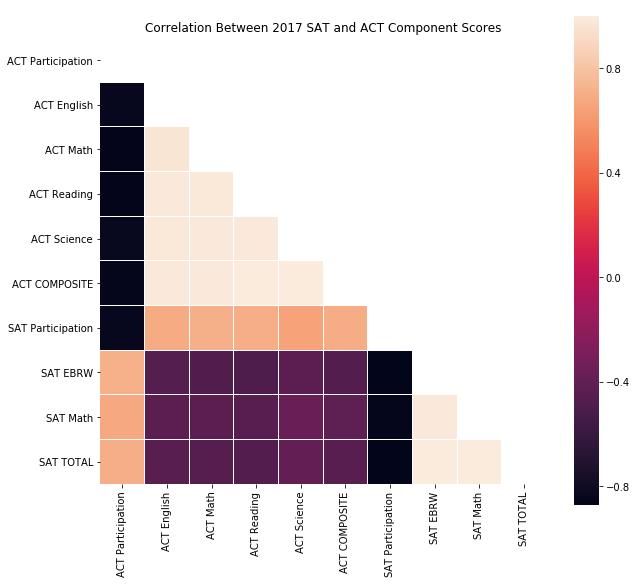

In [66]:
fig_2017 = plt.figure(figsize=(10,9))
ax_2017 = plt.axes()
ax_2017.set_title('\nCorrelation Between 2017 SAT and ACT Component Scores',loc='center');
xlabels = ['ACT Participation','ACT English','ACT Math','ACT Reading',
           'ACT Science','ACT COMPOSITE','SAT Participation','SAT EBRW','SAT Math','SAT TOTAL']
ylabels = xlabels
mask = np.zeros_like(df_combined_2017.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_combined_2017.corr(),linewidths=.1,square=True,ax=ax_2017,
           xticklabels=xlabels,yticklabels=ylabels,mask=mask);


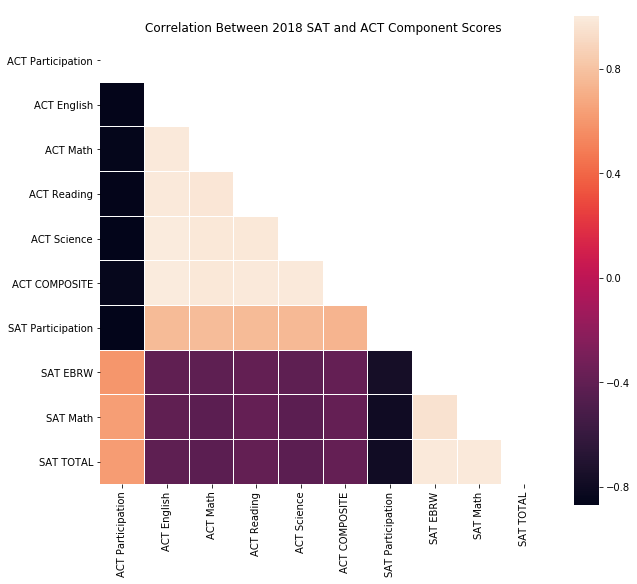

In [67]:
fig_2018 = plt.figure(figsize=(10,9))
ax_2018 = plt.axes()
ax_2018.set_title('\nCorrelation Between 2018 SAT and ACT Component Scores',loc='center');
mask = np.zeros_like(df_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(),linewidths=.1,square=True,ax=ax_2018,
           xticklabels=xlabels,yticklabels=ylabels,mask=mask);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [68]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # 2 subplots per row
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,6),sharey=True)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],align='mid') # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_yticks(np.arange(0,ax[i].get_ybound()[1]+1,1)) # set y ticks according to max y value


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [69]:
# Participation rates for SAT & ACT (2017)
subplot_histograms(df_combined_2017,['sat_participation','act_participation'],
                   ['2017 SAT Participation','2017 ACT Participation'],
                   ['State-level Rate','State-level Rate'])

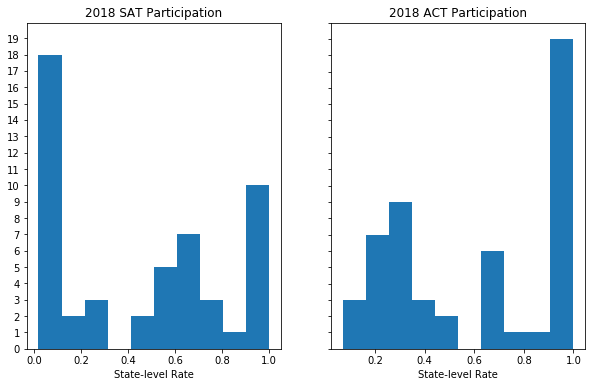

In [70]:
# Participation rates for SAT & ACT (2018)
subplot_histograms(df_final,['sat_participation','act_participation'],
                   ['2018 SAT Participation','2018 ACT Participation'],
                   ['State-level Rate','State-level Rate'])

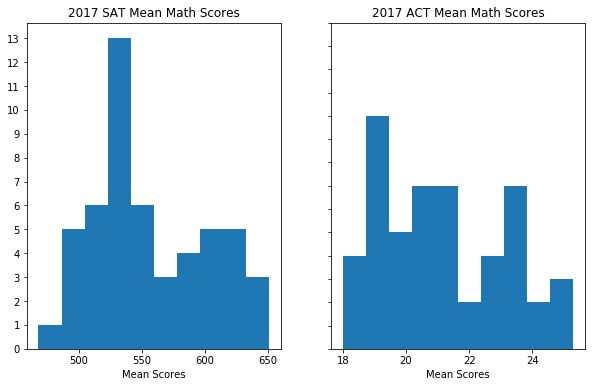

In [71]:
# Math scores for SAT & ACT (2017)
subplot_histograms(df_combined_2017,['sat_math','act_math'],
                   ['2017 SAT Mean Math Scores','2017 ACT Mean Math Scores'],
                   ['Mean Scores','Mean Scores'])

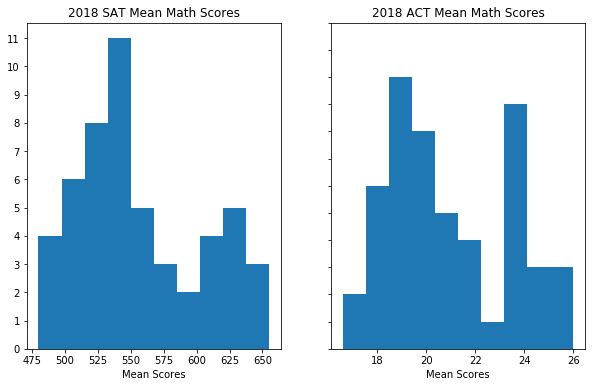

In [72]:
# Math scores for SAT & ACT (2018)
subplot_histograms(df_final,['sat_math','act_math'],
                   ['2018 SAT Mean Math Scores','2018 ACT Mean Math Scores'],
                   ['Mean Scores','Mean Scores'])

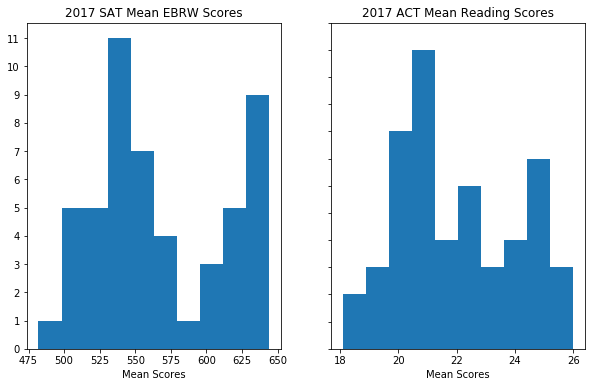

In [73]:
# Reading/verbal scores for SAT & ACT (2017)
subplot_histograms(df_combined_2017,['sat_ebrw','act_reading'],
                   ['2017 SAT Mean EBRW Scores','2017 ACT Mean Reading Scores'],
                   ['Mean Scores','Mean Scores'])

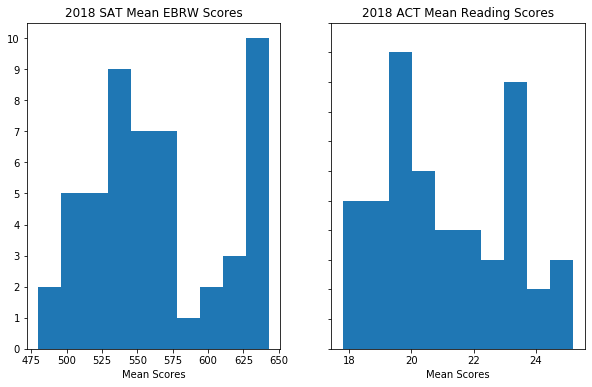

In [74]:
# Reading/verbal scores for SAT & ACT (2018)
subplot_histograms(df_final,['sat_ebrw','act_reading'],
                   ['2018 SAT Mean EBRW Scores','2018 ACT Mean Reading Scores'],
                   ['Mean Scores','Mean Scores'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [75]:
# scatterplot - use matplotlib
def subplot_scatterplots(dataframe, list_of_column_pairs, list_of_titles, list_of_label_pairs):
    nrows = int(np.ceil(len(list_of_column_pairs)/2)) # 2 subplots per row
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12),sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_column_pairs): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_column_pairs[i][0]],dataframe[list_of_column_pairs[i][1]])
        ax[i].set_title(list_of_titles[i])     
        ax[i].set_xlabel(list_of_label_pairs[i][0])
        ax[i].set_ylabel(list_of_label_pairs[i][1])

# scatterplot - use matplotlib
def subplot_scatterplots_dflist(list_of_dataframes, list_of_column_pairs, list_of_titles, list_of_label_pairs):
    nrows = int(np.ceil(len(list_of_dataframes)/2)) # 2 subplots per row
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,5),sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_column_pairs): # Gives us an index value to get into all our lists
        ax[i].scatter(list_of_dataframes[i][list_of_column_pairs[i][0]],list_of_dataframes[i][list_of_column_pairs[i][1]])
        ax[i].set_title(list_of_titles[i])     
        ax[i].set_xlabel(list_of_label_pairs[i][0])
        ax[i].set_ylabel(list_of_label_pairs[i][1])

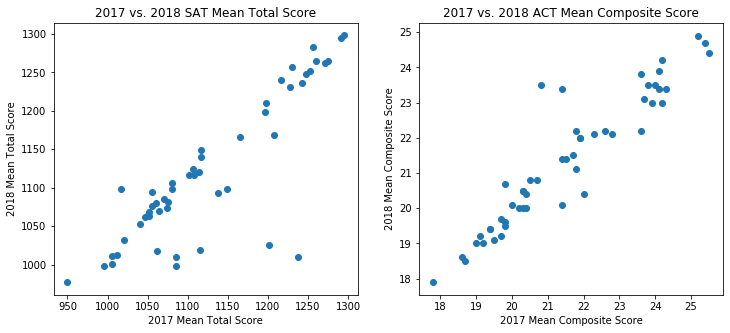

In [76]:
# Populate lists to be passed as arguments to subplot_scatterplots()
sat_act_2017_col_pairs = [('sat_math','act_math'),('sat_ebrw','act_reading'),('sat_total','act_composite')]
sat_act_2017_titles = ['2017 SAT vs. ACT Math','2017 SAT vs. ACT Verbal/Reading','2017 SAT vs. ACT Total/Composite']
sat_act_2017_label_pairs = [('SAT Mean Math Scores','ACT Mean Math Scores'),
                            ('SAT Mean EBRW Scores','ACT Mean Reading Scores'),
                            ('SAT Mean Total','ACT Mean Composite')]

# Total scores for SAT 2017 vs. 2018 => create a new dataframe
df_sat_total_2017_2018 = pd.concat([df_combined_2017['sat_total'], df_final['sat_total']],axis=1)
df_sat_total_2017_2018.columns = ['sat_total_2017','sat_total_2018']

# Composite scores for ACT 2017 vs. 2018 => create a new dataframe
df_act_comp_2017_2018 = pd.concat([df_combined_2017['act_composite'], df_final['act_composite']],axis=1)
df_act_comp_2017_2018.columns = ['act_composite_2017','act_composite_2018']

# Populate lists to be passed as arguments to subplot_scatterplots_dflist()
list_df = [df_sat_total_2017_2018, df_act_comp_2017_2018]
list_col_pair = [('sat_total_2017','sat_total_2018'), ('act_composite_2017','act_composite_2018')]
list_title = ['2017 vs. 2018 SAT Mean Total Score', '2017 vs. 2018 ACT Mean Composite Score']
list_label_pair = [('2017 Mean Total Score','2018 Mean Total Score'), 
                   ('2017 Mean Composite Score','2018 Mean Composite Score')]

# Plot scatterplots!
subplot_scatterplots(df_combined_2017, sat_act_2017_col_pairs, sat_act_2017_titles, sat_act_2017_label_pairs)
subplot_scatterplots_dflist(list_df, list_col_pair, list_title, list_label_pair)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

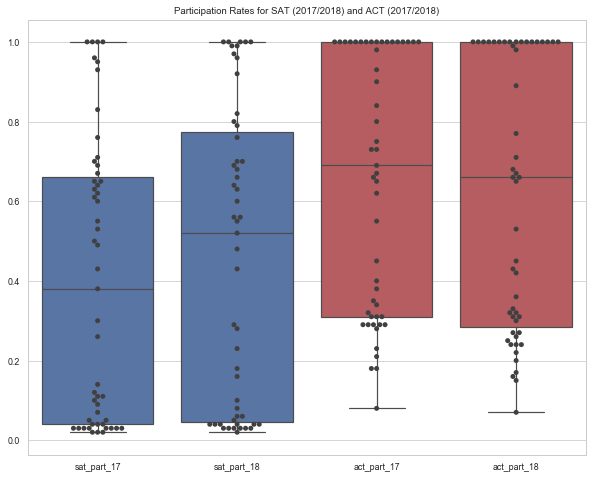

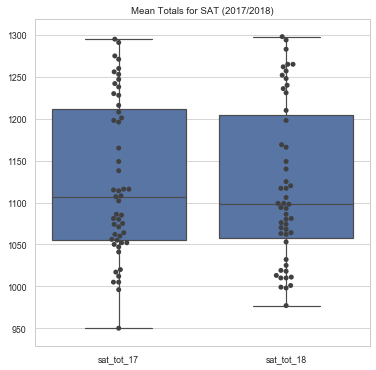

In [77]:
# prepare a consolidated dataframe and name the columns
df_sat_act_stats_2years = pd.concat([df_combined_2017['state'],
                                     df_combined_2017['sat_participation'], df_final['sat_participation'],
                                    df_combined_2017['act_participation'], df_final['act_participation'],
                                    df_combined_2017['sat_total'], df_final['sat_total'],
                                    df_combined_2017['act_composite'], df_final['act_composite']], axis=1)

df_sat_act_stats_2years.columns = ['state','sat_part_17', 'sat_part_18', 'act_part_17', 'act_part_18',
                                  'sat_tot_17', 'sat_tot_18', 'act_comp_17', 'act_comp_18']


# plot boxplots and swarmplots for SAT/ACT Participation 2017 & 2018
sns.set(context='paper',style='whitegrid',font_scale=1)
plt.subplots(figsize=(10,8))
plt.title('Participation Rates for SAT (2017/2018) and ACT (2017/2018)')
sns.boxplot(data=df_sat_act_stats_2years[['sat_part_17','sat_part_18','act_part_17','act_part_18']],
                   palette={'sat_part_17':'b','sat_part_18':'b','act_part_17':'r','act_part_18':'r'});
sns.swarmplot(data=df_sat_act_stats_2years[['sat_part_17','sat_part_18','act_part_17','act_part_18']],color=".25");

# plot boxplots and swarmplots for SAT Mean Total scores 2017 & 2018
plt.subplots(figsize=(6,6))
plt.title('Mean Totals for SAT (2017/2018)')
sns.boxplot(data=df_sat_act_stats_2years[['sat_tot_17','sat_tot_18']],
                   palette={'sat_tot_17':'b','sat_tot_18':'b'});
sns.swarmplot(data=df_sat_act_stats_2years[['sat_tot_17','sat_tot_18']],color=".25");

# plot boxplots and swarmplots for ACT Mean Composite scores 2017 & 2018
plt.subplots(figsize=(6,6))
plt.title('Mean Composite for ACT (2017/2018)')
sns.boxplot(data=df_sat_act_stats_2years[['act_comp_17','act_comp_18']],
                   palette={'act_comp_17':'r','act_comp_18':'r'});
sns.swarmplot(data=df_sat_act_stats_2years[['act_comp_17','act_comp_18']],color=".25");

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [78]:
# consider using plots from "Outside Research" section to put into here.....

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### ACT Participation rates
##### The following apply to 2017 & 2018 respectively:
- The means are about 0.65 and 0.62.
- The medians are 0.69 and 0.66.
- The standard deviations are about 0.32 and 0.34.
- The ranges are between 0.07 and 1.0.
- The largest proportion (~18-19nos. or 37%) of states have rates close to 1.0.
- The 2nd largest proportion of states had rates around 0.3.
- The distributions are left-skewed.

In [79]:
# 2017,2018 ACT Participation
print('Median for 2017,2018:\t',df_combined_2017['act_participation'].median(),df_final['act_participation'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_participation']),stats.skew(df_final['act_participation']))
xbins=20
plt.hist(df_combined_2017['act_participation'],bins=xbins);
plt.hist(df_final['act_participation'],bins=xbins,alpha=0.4);
plt.show()

Median for 2017,2018:	 0.69 0.66
Skewness for 2017,2018: -0.19211796242279894 -0.026184169649572864


### ACT English mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 20.93 and 21.50.
- The medians are 20.7 and 21.30.
- The standard deviations are about 2.35 & 2.11.
- The ranges are between 16.30 and 25.60.
- The distributions are right-skewed.

Median for 2017,2018:	 20.7 21.3
Skewness for 2017,2018: 0.34220217359811805 0.2635066087178296


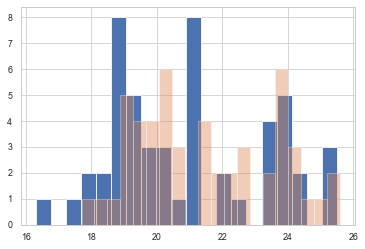

In [80]:
# 2017,2018 ACT English
print('Median for 2017,2018:\t',df_combined_2017['act_english'].median(),df_final['act_english'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_english']),stats.skew(df_final['act_english']))
xbins=20
plt.hist(df_combined_2017['act_english'],bins=xbins);
plt.hist(df_final['act_english'],bins=xbins,alpha=0.4);

### ACT Math mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 21.18 and 21.50.
- The medians are 20.9 and 20.2.
- The standard deviations are about 1.98 & 2.45.
- The ranges are between 16.60 and 26.00.
- The distributions are right-skewed.

Median for 2017,2018:	 20.9 20.2
Skewness for 2017,2018: 0.3228174361152988 0.3604894183850984


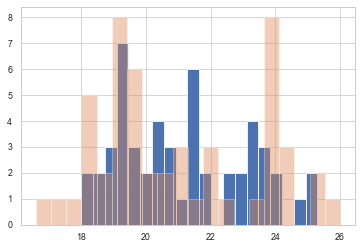

In [81]:
# 2017,2018 ACT Math
print('Median for 2017,2018:\t',df_combined_2017['act_math'].median(),df_final['act_math'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_math']),stats.skew(df_final['act_math']))
xbins=20
plt.hist(df_combined_2017['act_math'],bins=xbins);
plt.hist(df_final['act_math'],bins=xbins,alpha=0.4);

### ACT Reading mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 22.01 and 21.13.
- The medians are 21.8 and 20.7.
- The standard deviations are about 2.07 & 2.04.
- The ranges are between 17.80 and 26.00.
- The distributions are right-skewed.

Median for 2017,2018:	 21.8 20.7
Skewness for 2017,2018: 0.2613779187300745 0.2615541273504424


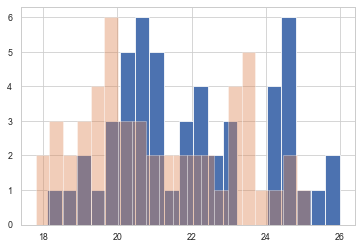

In [82]:
# 2017,2018 ACT Reading
print('Median for 2017,2018:\t',df_combined_2017['act_reading'].median(),df_final['act_reading'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_reading']),stats.skew(df_final['act_reading']))
xbins=20
plt.hist(df_combined_2017['act_reading'],bins=xbins);
plt.hist(df_final['act_reading'],bins=xbins,alpha=0.4);

### ACT Science mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 21.45 and 22.02.
- The medians are 21.3 and 21.6.
- The standard deviations are about 3.18 & 2.17.
- The ranges are between 18.00 and 26.10.
- The distributions are right-skewed.

Median for 2017,2018:	 21.3 21.6
Skewness for 2017,2018: 0.21233390930923077 0.1953899076147242


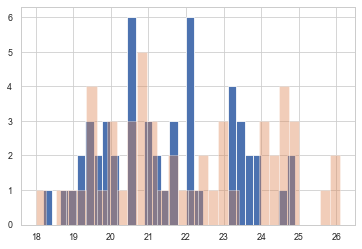

In [83]:
# 2017,2018 ACT Science
print('Median for 2017,2018:\t',df_combined_2017['act_science'].median(),df_final['act_science'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_science']),stats.skew(df_final['act_science']))
xbins=30
plt.hist(df_combined_2017['act_science'],bins=xbins);
plt.hist(df_final['act_science'],bins=xbins,alpha=0.4);

### ACT Composite mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 21.52 and 21.34.
- The medians are 21.4 and 21.1.
- The standard deviations are about 2.02 & 1.87.
- The ranges are between 17.80 and 25.50.
- The distributions are right-skewed.

Median for 2017,2018:	 21.4 21.1
Skewness for 2017,2018: 0.3103255637098951 0.17179423157849594


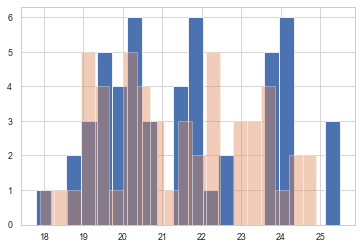

In [84]:
# 2017,2018 ACT Composite
print('Median for 2017,2018:\t',df_combined_2017['act_composite'].median(),df_final['act_composite'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['act_composite']),stats.skew(df_final['act_composite']))
xbins=20
plt.hist(df_combined_2017['act_composite'],bins=xbins);
plt.hist(df_final['act_composite'],bins=xbins,alpha=0.4);

### SAT Participation rates
##### The following apply to 2017 & 2018 respectively:
- The means are about 0.40 and 0.46.
- The medians are 0.38 and 0.52.
- The standard deviations are about 0.35 and 0.37.
- The ranges are between 0.02 and 1.0.
- The largest proportion (16nos. or 31%) of states have rates close to 0.1.
- The 2nd largest proportion of states (~9nos. or 18%) have rates around 1.0.
- The distributions are right-skewed.

Median for 2017,2018:	 0.38 0.52
Skewness for 2017,2018: 0.33617543925343585 0.13218842829757055


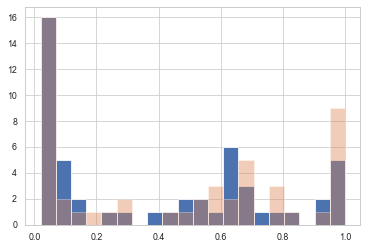

In [85]:
# 2017,2018 SAT Participation
print('Median for 2017,2018:\t',df_combined_2017['sat_participation'].median(),df_final['sat_participation'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['sat_participation']),stats.skew(df_final['sat_participation']))
xbins=20
plt.hist(df_combined_2017['sat_participation'],bins=xbins);
plt.hist(df_final['sat_participation'],bins=xbins,alpha=0.4);

### SAT Evidence Based Reading & Writing mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 569 and 564.
- The medians are 559 and 552.
- The standard deviations are about 45.67 & 47.50.
- The ranges are between 480 and 644.
- The distributions are right-skewed.

Median for 2017,2018:	 559.0 552.0
Skewness for 2017,2018: 0.2646065965076702 0.27392797109625916


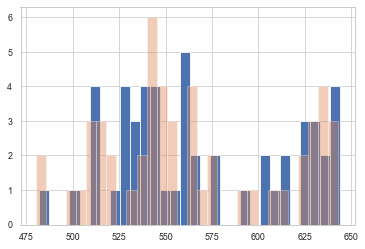

In [86]:
# 2017,2018 SAT Evidence Based Reading & Writing(EBRW)
print('Median for 2017,2018:\t',df_combined_2017['sat_ebrw'].median(),df_final['sat_ebrw'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['sat_ebrw']),stats.skew(df_final['sat_ebrw']))
xbins=30
plt.hist(df_combined_2017['sat_ebrw'],bins=xbins);
plt.hist(df_final['sat_ebrw'],bins=xbins,alpha=0.4);

### SAT Math mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 557 and 556.
- The medians are 548 and 544.
- The standard deviations are about 47.12 & 47.77.
- The ranges are between 468 and 655.
- The distributions are right-skewed.

Median for 2017,2018:	 548.0 544.0
Skewness for 2017,2018: 0.35421485843432615 0.514677775442769


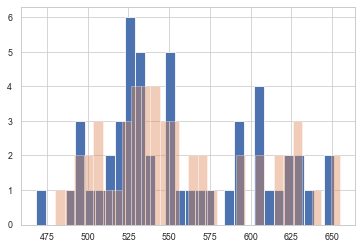

In [87]:
# 2017,2018 SAT Math
print('Median for 2017,2018:\t',df_combined_2017['sat_math'].median(),df_final['sat_math'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['sat_math']),stats.skew(df_final['sat_math']))
xbins=30
plt.hist(df_combined_2017['sat_math'],bins=xbins);
plt.hist(df_final['sat_math'],bins=xbins,alpha=0.4);

### SAT Total mean scores
##### The following apply to 2017 & 2018 respectively:
- The means are about 1126 and 1120.
- The medians are 1107 and 1098.
- The standard deviations are about 92.49 & 94.16.
- The ranges are between 950 and 1298.
- The distributions are right-skewed.

Median for 2017,2018:	 1107.0 1098.0
Skewness for 2017,2018: 0.30168334986069095 0.4525994928716571


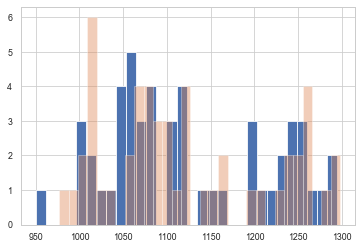

In [88]:
# 2017,2018 SAT Total
print('Median for 2017,2018:\t',df_combined_2017['sat_total'].median(),df_final['sat_total'].median())
print('Skewness for 2017,2018:',stats.skew(df_combined_2017['sat_total']),stats.skew(df_final['sat_total']))
xbins=30
plt.hist(df_combined_2017['sat_total'],bins=xbins);
plt.hist(df_final['sat_total'],bins=xbins,alpha=0.4);

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, we generally do not observe this trend in the 2017 and 2018 data.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [89]:
print('\n1)2018 ACT Math / Normality Test & Skew -')
print(stats.normaltest(df_final['act_math']),'skew:', stats.skew(df_final['act_math']))
print('\n2)2018 SAT Math / Normality Test & Skew -')
print(stats.normaltest(df_final['sat_math']),'skew:', stats.skew(df_final['sat_math']))
print('\n3)2018 ACT Reading / Normality Test & Skew -')
print(stats.normaltest(df_final['act_reading']),'skew:', stats.skew(df_final['act_reading']))
print('\n4)2018 SAT Evidence Based Reading & Writing / Normality Test & Skew -')
print(stats.normaltest(df_final['sat_ebrw']),'skew:', stats.skew(df_final['sat_ebrw']))
print('\n5)2018 ACT Participation / Normality Test & Skew -')
print(stats.normaltest(df_final['act_participation']),'skew:', stats.skew(df_final['act_participation']))
print('\n6)2018 SAT Participation / Normality Test & Skew -')
print(stats.normaltest(df_final['sat_participation']),'skew:', stats.skew(df_final['sat_participation']))


1)2018 ACT Math / Normality Test & Skew -
NormaltestResult(statistic=8.998260111683463, pvalue=0.011118664949764285) skew: 0.3604894183850984

2)2018 SAT Math / Normality Test & Skew -
NormaltestResult(statistic=4.8457529089366815, pvalue=0.08866620599134843) skew: 0.514677775442769

3)2018 ACT Reading / Normality Test & Skew -
NormaltestResult(statistic=9.493830792428861, pvalue=0.008678423456739134) skew: 0.2615541273504424

4)2018 SAT Evidence Based Reading & Writing / Normality Test & Skew -
NormaltestResult(statistic=8.010167731290034, pvalue=0.01822276093099164) skew: 0.27392797109625916

5)2018 ACT Participation / Normality Test & Skew -
NormaltestResult(statistic=136.08991476981527, pvalue=2.8083451770644226e-30) skew: -0.026184169649572864

6)2018 SAT Participation / Normality Test & Skew -
NormaltestResult(statistic=52.623871321382026, pvalue=3.739999415853542e-12) skew: 0.13218842829757055


#### Answer:

The above tests were carried out to determine whether the above datasets followed the normal distribution and the extent for which they were skewed. An alpha value of 0.05 is assumed, against which the above p-values are compared.

Also kindly refer to the following:

* https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php
* http://www.psychwiki.com/wiki/How_do_I_determine_whether_my_data_are_normal%3F
* https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis

##### 1) 2018 ACT Math:
This data can be considered normally distributed (pv < alpha). It is slightly skewed to the right but the mean can still be used as a measure of central tendency.
##### 2) 2018 SAT Math:
This data cannot be considered normally distributed (pv > alpha). The measures of central tendency are not reliable for estimations that assume a normal sampling distribution means.
##### 3) 2018 ACT Reading:
This data can be considered normally distributed (pv < alpha). It is slightly skewed to the right but the mean can still be used as a measure of central tendency.
##### 4) 2018 SAT Evidence-Based Reading & Writing:
This data can be considered normally distributed (pv < alpha). It is slightly skewed to the right but the mean can still be used as a measure of central tendency.
##### 5) 2018 ACT Participation:
This data cannot be considered normally distributed (pv > alpha). The measures of central tendency are not reliable for estimations that assume a normal sampling distribution means.
##### 5) 2018 SAT Participation:
This data cannot be considered normally distributed (pv > alpha). The measures of central tendency are not reliable for estimations that assume a normal sampling distribution means.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

Yes, it makes sense to do so in this partcular case, for the following reasons.
   
For each state, the rate provided in the data is the actual participation rate rather than a statistic (e.g. mean value). The rate represents the percentage of high school students graduating in 2017 who took the test.

The participation rate for every state is also provided in the data. Therefore, the data points provided represent the complete collection of such data for the states.

Based on the given data, it is possible to establish that the SAT and ACT participation rates are inversely correlated (refer to the scatter plot below).


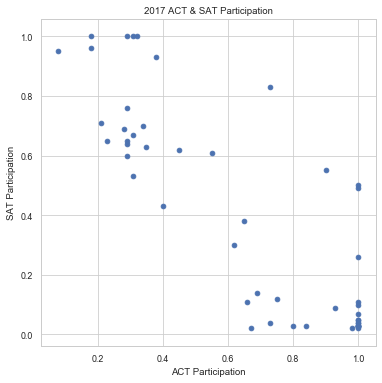

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df_combined_2017['act_participation'],df_combined_2017['sat_participation'])
ax.set_title('2017 ACT & SAT Participation')
ax.set_xlabel('ACT Participation')
ax.set_ylabel('SAT Participation');

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

No.  

The SAT and ACT partcipation rates are inversely correlated. Therefore, in many states, the number of students taking the ACT will differ significantly from the number of students taking the SAT. Therefore, a meaningful state-by-state comparison would not be feasible.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Null Hypothesis: The SAT participation rate is not lower when when the state has a mandatory high school leaving exam.

Alternative Hypothesis: The SAT participation rate is lower when the state has a mandatory high school leaving exam.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [107]:
# add column 'sat_part_chg' into dataframe
# this shows the change in SAT participation rate from 2017 to 2018
df_sat_act_stats_2years['sat_part_chg']=df_sat_act_stats_2years['sat_part_18']-df_sat_act_stats_2years['sat_part_17']
df_sat_act_stats_2years.sort_values(by='sat_part_chg',ascending=False)[['state','sat_part_chg',
                                                                        'sat_part_17','sat_part_18',
                                                                      'act_part_17','act_part_18']].head(2)

state  sat_part_chg  sat_part_17  sat_part_18  act_part_17  act_part_18
13  Illinois          0.90         0.09         0.99         0.93         0.43
5   Colorado          0.89         0.11         1.00         1.00         0.30

Illinois and Colorado had the largest increase in SAT participation rate from 2017 to 2018.

In [105]:
df_sat_act_stats_2years[(df_sat_act_stats_2years['state']=='South Carolina')][['state','sat_part_chg',
                                                                               'sat_part_17','sat_part_18',
                                                                               'act_part_17','act_part_18']].head(3)

state  sat_part_chg  sat_part_17  sat_part_18  act_part_17  \
40  South Carolina          0.05          0.5         0.55          1.0   

    act_part_18  
40          1.0

South Carolina had the largest combined participation rate for both the SAT (55%) and ACT (100%) in 2018.

The 3 states of interestest are therefore:

- Illinois
- Colorado
- South Carolina

###### Illinois, Colorado

Illinois and Colorado, among other states, gave SAT for free / SAT School Day during the 2017-2018 school year:
https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever  from which the following is quoted -

"In the 2017-18 school year, nearly one million students participated in SAT School Day, compared to about 800,000 in 2016-17 and 460,000 in 2015-16. In 2014-15, only three states—Delaware, Idaho, Maine—and the District of Columbia participated in SAT School Day. In 2017-18, 10 states—Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, West Virginia—and the District of Columbia gave the SAT to public school students for free. SAT School Day has grown significantly, as has the consensus among researchers that offering the SAT no cost during the school day eases the way to college for more students." [end quote]

The SAT School Day appears to have had a significant positive impact on the SAT participation rate.

###### South Carolina

Refer to page 8, para "High School Assessment Program" - 
https://sc.edu/nrc/system/pub_files/1532449726_0.pdf  from which the following is quoted -

"The High School Assessment Program (HSAP) was a state assessment tool formerly used to gauge the level of
comprehension among high school students in content areas English and math... Due to significant deficiencies within the program, policymakers passed Act 155 in 2014, eliminating the requirement for all students to take the HSAP. Act 155 stipulates that the HSAP must be replaced with more successful programs like ACT WorkKeys and the SAT. These programs are more appropriate ways to assess college and career readiness among students, while helping them prepare for the future." [end quote]

The elimination of the high school exit examination and endorsement of the ACT/SAT as a viable replacement is likely to have contributed to the exceptional combined particiation rates for the ACT and SAT.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [117]:
df_sat_act_stats_2years[df_sat_act_stats_2years['state']=='Missouri']

state  sat_part_17  sat_part_18  act_part_17  act_part_18  sat_tot_17  \
25  Missouri         0.03         0.04          1.0          1.0        1271   

    sat_tot_18  act_comp_17  act_comp_18  sat_part_chg  
25        1262         20.4         20.0          0.01

##### Recommendations
- More states should participate in the SAT School Day program as this appears to have a significant impact on SAT participation rate among the high school graduating class.
- Individual states should consider eliminating the their state-speficic high school exit assessment tests in favour of the SAT and/or ACT

##### Missouri
- This state has a 2017/2018 SAT participation rate of 0.03 and 0.04 respectively.
- This state implements a high-school exit exam called the Missouri Assessment Program, according to: https://en.wikipedia.org/wiki/List_of_exit_examinations_in_the_United_States
- This state has not participated in the SAT School Day program
- ###### Suggestion: Missouri should participate in the SAT School Day program and consider if it should abolish the Missouri Assessment Program in favour of the SAT/ACT.

##### Additional Data Desired
- The SAT/ACT participation rates for South Carolina in 2013, 2014, 2015 & 2016. The HSAP exit exam was abolished with effect from 2015 onwards. I would want to study the participation rates before and after the HSAP was abolised to determine the extent of impact to the SAT/ACT participation rates in South Carolina.
- The median household income in states that participated in the SAT School Day in school year 2017-2018 to study the correlation between household income and SAT exams being offerred free of charge.
- What proportion of high school students are given mock SAT exams vs. mock ACT exams to try out before deciding which test to take. 